<p style="font-name: monospace; line-height: 2; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center;">بسم الله الرحمن الرحيم</p>

# Linear Regression

# Library Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

# Data Import

In [26]:
housing = pd.read_csv('../Data/kc_house.csv')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             341 non-null    int64  
 1   price          341 non-null    float64
 2   bedrooms       341 non-null    int64  
 3   bathrooms      341 non-null    float64
 4   sqft_living    341 non-null    float64
 5   sqft_lot       341 non-null    float64
 6   floors         341 non-null    float64
 7   waterfront     341 non-null    int64  
 8   sqft_living15  341 non-null    float64
 9   sqft_lot15     341 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 26.8 KB


In [27]:
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_living15,sqft_lot15
0,7922800400,95.10,5,3.25,3.25,14.342,2.0,0,2.96,11.044
1,1516000055,65.00,3,2.25,2.15,21.235,1.0,0,2.57,18.900
2,2123039032,36.99,1,0.75,0.76,10.079,1.0,1,1.23,14.267
3,9297300045,55.00,3,2.00,1.97,4.166,2.0,0,2.39,4.166
4,1860600135,238.40,5,2.50,3.65,9.050,2.0,0,2.88,5.400


# Data Cleaning

## Drop Irrelevant Columns

In [29]:
housing_new = housing.drop(columns=['id', 'sqft_living15', 'sqft_lot15'])
housing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        341 non-null    float64
 1   bedrooms     341 non-null    int64  
 2   bathrooms    341 non-null    float64
 3   sqft_living  341 non-null    float64
 4   sqft_lot     341 non-null    float64
 5   floors       341 non-null    float64
 6   waterfront   341 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 18.8 KB


In [30]:
np.sum(housing_new.isnull())

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
dtype: int64

Our target variable will be price. We will determine which predictor to use for our linear regression model

# Determine Predictor Variable

## Create scatterplot matrix

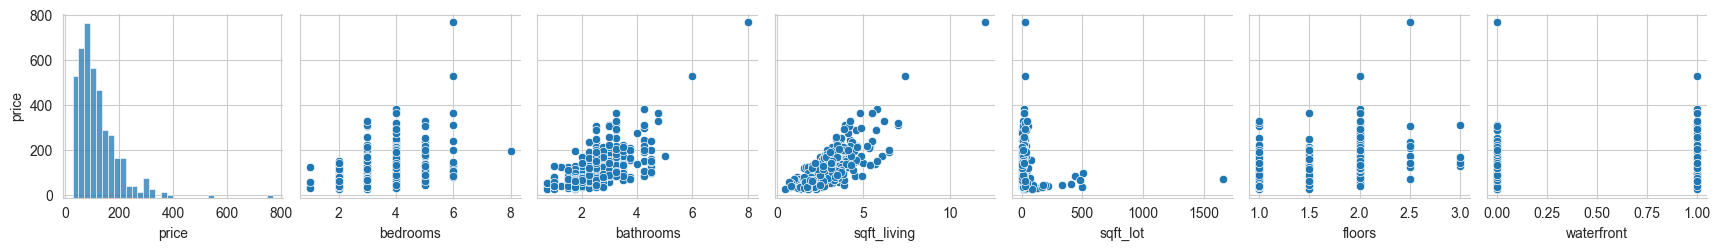

In [32]:
sns.pairplot(housing_new, y_vars=['price'], x_vars=[*housing_new.columns.values])

## Create a correlation heatmap

<AxesSubplot:>

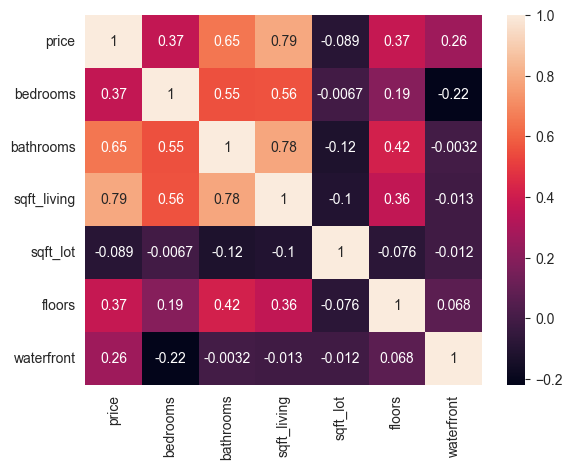

In [37]:
sns.heatmap(housing_new.corr(), annot=True)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

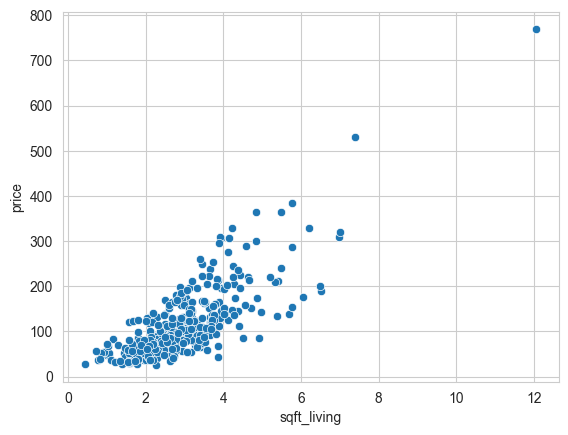

In [40]:
sns.scatterplot(x=housing_new.sqft_living, y=housing_new.price)

The most correlated feature with price is sqft_living. We will use it as our predicor/independent variable

# Train and Test Data Split

In [45]:
X = housing_new.sqft_living
y = housing_new.price

In [46]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Reshape the X_train array to be 2D

In [65]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Build the Linear Regression Model

In [66]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression().fit(X_train, y_train)

In [67]:
linear_regression.coef_

array([53.15352117])

In [68]:
linear_regression.intercept_

-39.06702903477162

price = 53.1535(sqft_living) -39.06

In [79]:
linear_regression.score(X_test, y_test)

0.39883496163790666